In [1]:
import numpy as np
import torch

from train import TrainerDeepSVDD

from preprocess import get_mnist
from preprocess import get_mvtec, get_multi_mvtec

In [2]:
class Args:

    num_epochs=150
    num_epochs_ae=150
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=32
    normal_class = 1
    mvtec_dir = './data/mvtec__2'

    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # mnist datset
# data = get_mnist(args)

# mvtec dataset(custom dataset)
data = get_mvtec(args.mvtec_dir)

# # mvtec multi dataset(custom dataset)
# data = get_multi_mvtec(args.mvtec_dir)
deep_SVDD = TrainerDeepSVDD(args, data, device)



In [3]:
if args.pretrain:
    deep_SVDD.pretrain()

  32/3629: [>...............................] - ETA 0.0storch.Size([32, 2, 4, 4])
  64/3629: [>...............................] - ETA 80.8storch.Size([32, 2, 4, 4])
  96/3629: [>...............................] - ETA 80.1storch.Size([32, 2, 4, 4])
 128/3629: [>...............................] - ETA 79.4storch.Size([32, 2, 4, 4])
 160/3629: [=>..............................] - ETA 78.7storch.Size([32, 2, 4, 4])
 192/3629: [=>..............................] - ETA 78.0storch.Size([32, 2, 4, 4])
 224/3629: [=>..............................] - ETA 77.2storch.Size([32, 2, 4, 4])
 256/3629: [=>..............................] - ETA 76.5storch.Size([32, 2, 4, 4])
 288/3629: [==>.............................] - ETA 75.8storch.Size([32, 2, 4, 4])
 320/3629: [==>.............................] - ETA 75.1storch.Size([32, 2, 4, 4])
 352/3629: [==>.............................] - ETA 74.4storch.Size([32, 2, 4, 4])
 384/3629: [===>............................] - ETA 73.7storch.Size([32, 2, 4, 4])
 416/

3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 0, Loss: 13.580
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 1, Loss: 0.086
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 2, Loss: 0.050
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 3, Loss: 0.027
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 4, Loss: 0.016
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 5, Loss: 0.016
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 6, Loss: 0.013
3629/3629: [===============================>] - ETA 0.5ss
Training Deep SVDD... Epoch: 7, Loss: 0.008
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... Epoch: 8, Loss: 0.008
3629/3629: [===============================>] - ETA 0.6ss
Training Deep SVDD... E

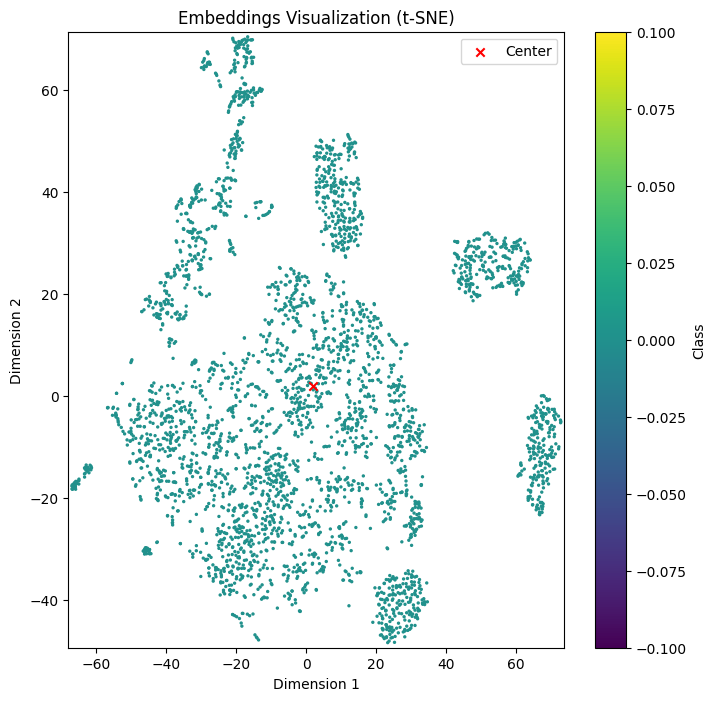

In [4]:
deep_SVDD.train()

Testing...
distances:{:.3f} tensor([0.0346, 0.0223, 0.0192, 0.0159, 0.0151, 0.0179, 0.0151, 0.0152, 0.0150,
        0.0160, 0.0153, 0.0150, 0.0390, 0.0139, 0.0163, 0.0149, 0.0198, 0.0346,
        0.0150, 0.0455, 0.0167, 0.0142, 0.0145, 0.0146, 0.0371, 0.0145, 0.0156,
        0.0149, 0.0217], device='cuda:0')
Min Distance_test: 0.014
Avg Distance_test: 0.020
Max Distance_test: 0.046


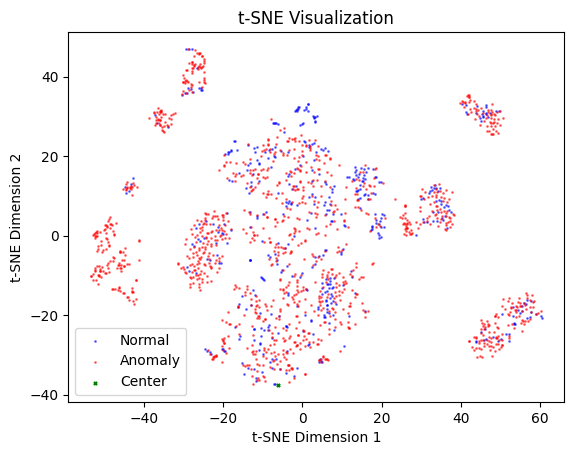

ROC AUC score: 50.55
Accuracy: 27.07%


In [5]:
from test import eval
# binary
labels, scores = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)

# # multi
# labels, scores, accuracy, class_accuracy = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)


Scores (Inliers): [0.00019812 0.00020437 0.00024572 0.00027644 0.00024268 0.00141233
 0.00026782 0.00167241 0.00024421 0.00029477 0.00023241 0.00020245
 0.00030648 0.00025194 0.0002612  0.0002207  0.00019213 0.00024981
 0.00022914 0.00031543 0.00023081 0.00030721 0.00035931 0.00022229
 0.00031821 0.00029685 0.00028716 0.00023953 0.00022896 0.00027598
 0.00026021 0.00024515 0.00025775 0.00139334 0.00023291 0.00026706
 0.00147399 0.00030173 0.00035168 0.00155911 0.00021435 0.00027176
 0.0002509  0.00023112 0.00023641 0.00025924 0.00019483 0.00015458
 0.00117201 0.00026005 0.00134197 0.0014008  0.00020915 0.00021605
 0.00025204 0.00059466 0.00022262 0.00031168 0.00021899 0.00021803
 0.00022599 0.001361   0.00019885 0.00027608 0.00029394 0.00030208
 0.00042686 0.00026849 0.00027199 0.00018587 0.0002449  0.00026397
 0.00216394 0.00154756 0.00017594 0.00021952 0.00017246 0.0002292
 0.00020818 0.00191622 0.00027034 0.00023706 0.00028203 0.00021667
 0.00021019 0.00022503 0.00023747 0.00021448 

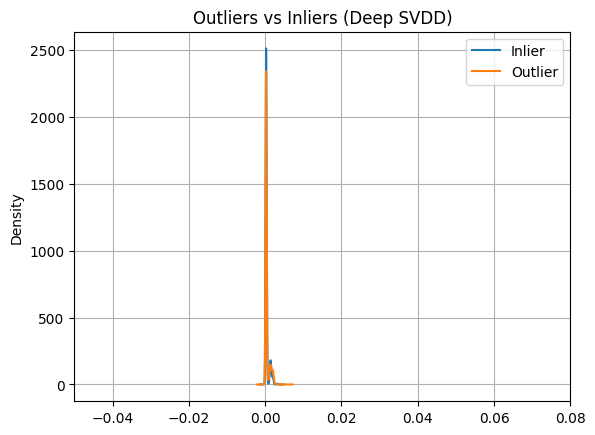

In [6]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]

# Print scores_in and scores_out
print("Scores (Inliers):", scores_in)
print("Scores (Outliers):", scores_out)


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()